# Analysis_1  disaster of Titanic   
## This analysis is about the probability of death in Titanic relating age
## Using Titanic.csv

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## load data and understand data

In [12]:
# see the variables, then to read the variable description below to understand them. 
raw_data = pd.read_csv('..\data\Titanic.csv',na_values='N/A')  #,index_col=0
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# to get some numerical variables
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# to get some categorical variables
raw_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Zabour, Miss. Hileni",male,347082,G6,S
freq,1,577,7,4,644


In [23]:
# to test whether have null values
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Deal with different type null value
### 1.Embarked   2. Cabin   3.Age

In [25]:
#Embarked is categorical,so to choose the most frequent occurance which is s
raw_data['Embarked'] = raw_data['Embarked'].fillna('S')

In [27]:
#Cabin is also categorical but has lots of nulls, so drop them
raw_data.drop('Cabin',axis=1,inplace=True)

In [40]:
#Age is numerical,so to fill the null values using median value
raw_data.Age=raw_data['Age'].fillna(raw_data['Age'].mean())

In [41]:
# check null again
raw_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## show data

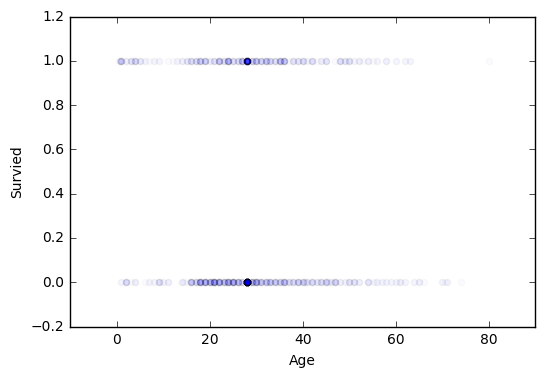

In [42]:
#This scatter can detect whether having wrong data 
plt.scatter(raw_data.Age,raw_data.Survived,alpha=0.02)
plt.xlabel('Age')
plt.ylabel('Survied')

In [68]:
#for showing better,need to calculate the probability of death at the same age span
#so divide the age into 20 sections
bins = np.linspace(raw_data.Age.min(),raw_data.Age.max(),20)
# to group according to whether in the same section
groups = raw_data.groupby(np.digitize(raw_data.Age,bins))
#calculate the probability 
final_data = groups[['Age','Survived']].mean()

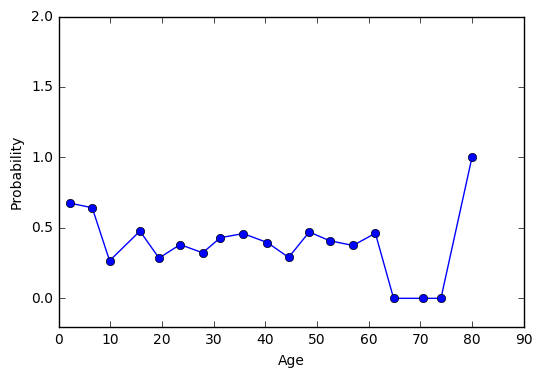

In [70]:
plt.plot(final_data.Age,final_data.Survived,'bo-')
plt.ylim(-0.2,2)
plt.xlim(0,90)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.savefig('ana_fianl_20s.png')